In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the '/home/sokane/PyBaMM/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
parameter_values = pybamm.ParameterValues("Ai2020")
model1 = pybamm.lithium_ion.DFN({"SEI": "solvent-diffusion limited"})
model2 = pybamm.lithium_ion.DFN({
    "particle mechanics": "swelling and cracking",
    "SEI": "solvent-diffusion limited",
    "SEI on cracks": "true",
})
experiment = pybamm.Experiment(["Discharge at 1C until 3 V"])
sim1 = pybamm.Simulation(model1, parameter_values=parameter_values, experiment=experiment)
sol1 = sim1.solve(calc_esoh=False)
sim2 = pybamm.Simulation(model2, parameter_values=parameter_values, experiment=experiment)
sol2 = sim2.solve(calc_esoh=False)

At t = 0.00698581, , mxstep steps taken before reaching tout.
At t = 0.00694142, , mxstep steps taken before reaching tout.


In [3]:
t1 = sol1["Time [s]"].entries
SEI1 = sol1["Loss of capacity to SEI [A.h]"].entries
t2 = sol2["Time [s]"].entries
SEI2 = sol2["Loss of capacity to SEI [A.h]"].entries + sol2["Loss of capacity to SEI on cracks [A.h]"].entries

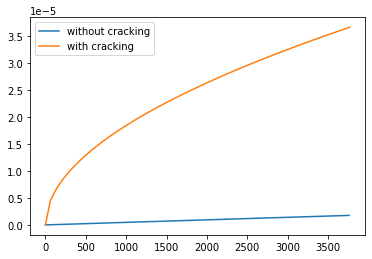

In [4]:
(fig, ax) = plt.subplots()
ax.plot(t1,SEI1,label="without cracking")
ax.plot(t2,SEI2,label="with cracking")
plt.legend()
plt.show()